In [1]:
# 기본 작업 경로 설정

import os
notebook_path = os.path.abspath("../../project_3_git/readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "DejaVu Sans")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import pandas as pd

metrics_yolo = pd.read_csv('yolov10/runs/detect/train/results.csv')

In [4]:
metrics_yolo

,epoch,train/box_om,train/cls_om,train/dfl_om,train/box_oo,train/cls_oo,train/dfl_oo,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_om,val/cls_om,val/dfl_om,val/box_oo,val/cls_oo,val/dfl_oo,lr/pg0,lr/pg1,lr/pg2
0,1,0.81651,2.21520,1.09350,0.83550,4.09030,1.04550,0.54447,0.68363,0.60240,0.49529,0.67536,1.57370,0.93851,0.70508,3.83300,0.91263,0.003324,0.003324,0.003324
1,2,0.76107,1.40250,0.99986,0.89627,2.23770,0.98772,0.62434,0.69122,0.69854,0.57884,0.66451,1.43160,0.93698,0.69715,1.89900,0.91929,0.006657,0.006657,0.006657
2,3,0.80298,1.30120,1.02340,0.95040,1.47290,1.02030,0.63354,0.67936,0.64745,0.52156,0.69311,1.38700,0.93593,0.78201,1.32350,0.94406,0.009989,0.009989,0.009989
3,4,0.80623,1.19090,1.03190,0.94472,1.20500,1.02590,0.68958,0.62191,0.67454,0.56332,0.66779,1.20520,0.92174,0.67466,1.28880,0.90925,0.009997,0.009997,0.009997
4,5,0.76685,1.04120,1.01990,0.90535,1.03830,1.00600,0.70190,0.73959,0.79639,0.66538,0.62129,0.86686,0.91630,0.66234,0.83070,0.89734,0.009997,0.009997,0.009997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.62088,0.57046,1.00030,0.68729,0.56938,0.94160,0.83443,0.82579,0.89462,0.77493,0.53998,0.55913,1.00230,0.55250,0.56256,0.88820,0.009944,0.009944,0.009944
59,60,0.62037,0.57350,0.99621,0.68693,0.57883,0.94166,0.80897,0.82341,0.88798,0.77291,0.53390,0.57506,0.99272,0.54232,0.58740,0.88188,0.009943,0.009943,0.009943
60,61,0.62056,0.56600,1.00480,0.69394,0.56868,0.93883,0.80536,0.83666,0.89222,0.77585,0.53750,0.55068,1.01860,0.54514,0.55467,0.88604,0.009942,0.009942,0.009942
61,62,0.62219,0.56184,1.01080,0.68988,0.56475,0.94193,0.83421,0.83272,0.89310,0.77721,0.53800,0.53742,1.01220,0.54298,0.55597,0.88635,0.009941,0.009941,0.009941


In [19]:
metrics_yolo.columns
len(metrics_yolo)

63

In [29]:
'                  epoch', '           train/box_om',
       '           train/cls_om', '           train/dfl_om',
       '           train/box_oo', '           train/cls_oo',
       '           train/dfl_oo', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '             val/box_om',
       '             val/cls_om', '             val/dfl_om',
       '             val/box_oo', '             val/cls_oo',
       '             val/dfl_oo', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'

Index(['                  epoch', '           train/box_om',
       '           train/cls_om', '           train/dfl_om',
       '           train/box_oo', '           train/cls_oo',
       '           train/dfl_oo', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '             val/box_om',
       '             val/cls_om', '             val/dfl_om',
       '             val/box_oo', '             val/cls_oo',
       '             val/dfl_oo', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [33]:
val_metrics = [ '             val/box_om', '             val/cls_om', '             val/dfl_om', '             val/box_oo', '             val/cls_oo', '             val/dfl_oo']

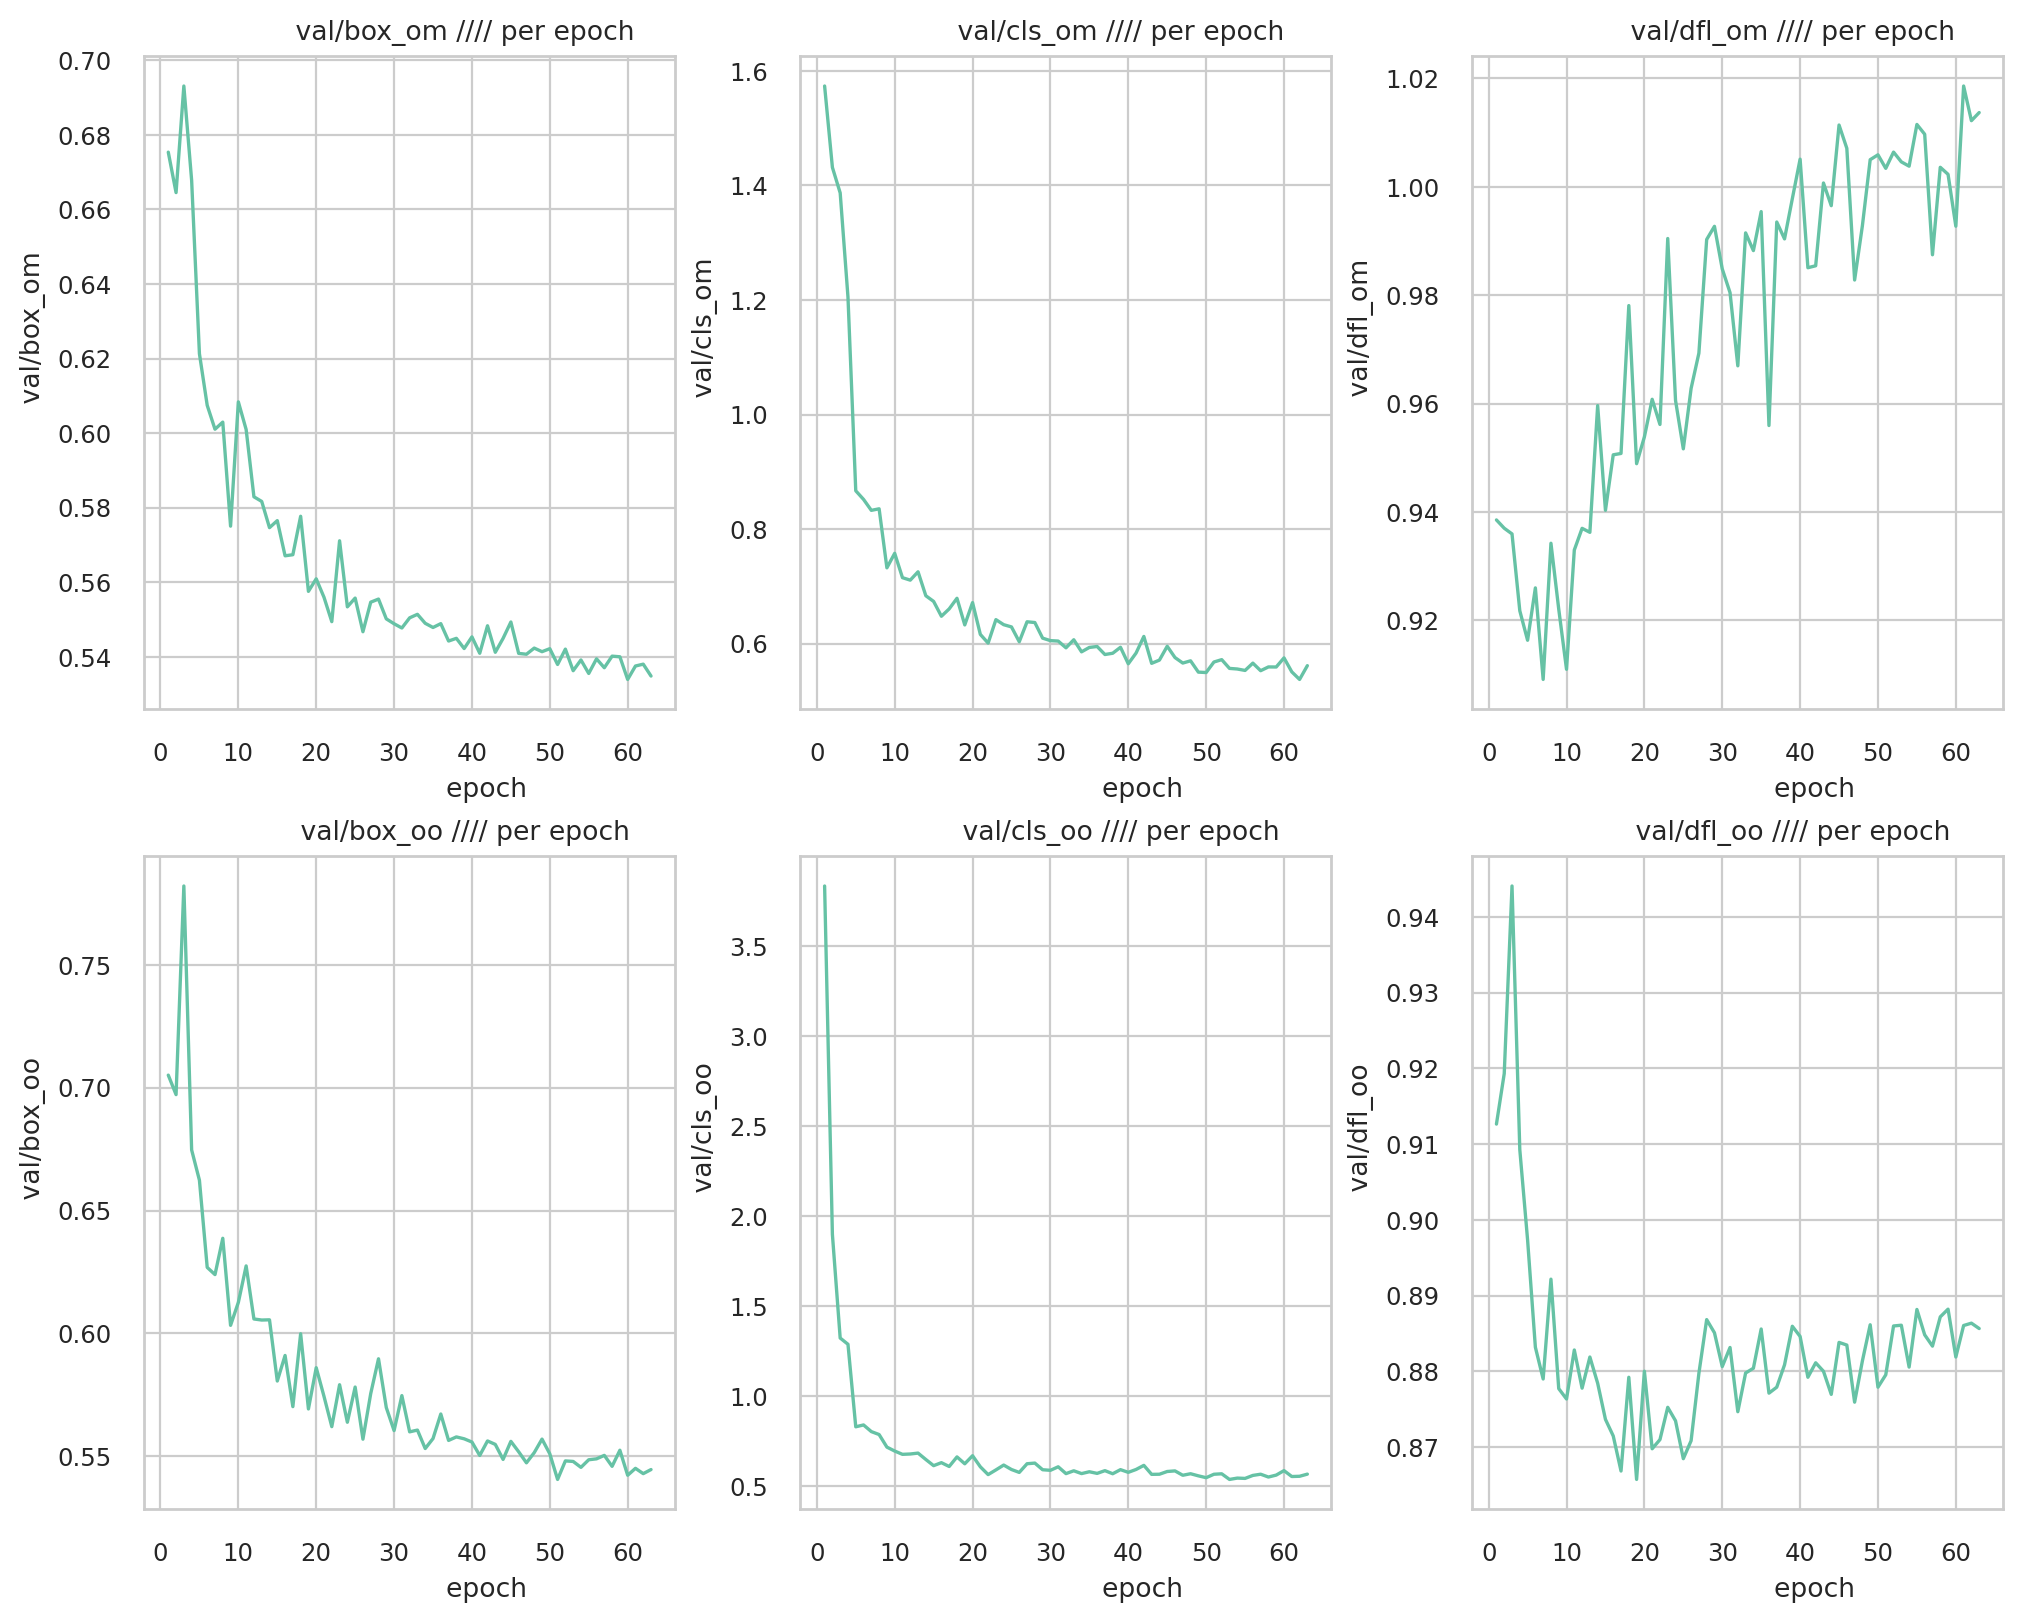

In [39]:
fig, ax = plt.subplots(2,3,figsize = (10,8))
ax = ax.flatten()

for i,coloumns in enumerate(val_metrics):
    
    sns.lineplot(data=metrics_yolo,
                x='                  epoch',
                y=coloumns,
                ax=ax[i])
    
    ax[i].set_title(coloumns + " //// per epoch")